##  Rinaldo Sonia - MRP - Delivarable - 2

### Exploratory Data Analysis

- Overview of Dataset
- Exploring the data
- Feature Engineering
- Feature Selection
- Data Visualization

In [347]:
!pip install geopandas

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [348]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from pandas import DataFrame
from pandas import concat
from pickle import dump
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score

In [349]:
#!pip install missingno

In [350]:
import os
import numpy as np
import pandas as pd
import more_itertools as mit
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

##### Overview of Dataset

In [351]:
##Raw files:
house_data = pd.read_csv("/Users/soniajoseph/Masters-DataScience/Major Research Project/thermal_demand_modelling-master-2/raw_data/3fc1a2969d4f28745af896b02c562bfc22fbda05.csv")

In [352]:
house_data.head()

DateTime HvacMode Event Schedule  T_ctrl  T_stp_cool  \
0  2019-01-01 00:00:00     heat  Hold    Sleep    70.0        70.0   
1  2019-01-01 00:05:00     heat  Hold    Sleep    70.0        70.0   
2  2019-01-01 00:10:00     heat  Hold    Sleep    70.0        70.0   
3  2019-01-01 00:15:00     heat  Hold    Sleep    70.0        70.0   
4  2019-01-01 00:20:00     heat  Hold    Sleep    70.0        70.0   

   T_stp_heat  Humidity  HumidityExpectedLow  HumidityExpectedHigh  ...  \
0        70.0      37.0                  0.0                   0.0  ...   
1        70.0      37.0                  0.0                   0.0  ...   
2        70.0      37.0                  0.0                   0.0  ...   
3        70.0      37.0                  0.0                   0.0  ...   
4        70.0      37.0                  0.0                   0.0  ...   

   Remote_Sensor_7_Temperature  Remote_Sensor_7_Motion  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   

   Remote_Sensor_8_Temperature  Remote_Sensor_8_Motion  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   

   Remote_Sensor_9_Temperature  Remote_Sensor_9_Motion  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   

   Remote_Sensor_10_Temperature  Remote_Sensor_10_Motion  T_out  RH_out  
0                           NaN                      NaN   41.0    95.0  
1                           NaN                      NaN   41.0    95.0  
2                           NaN                      NaN   41.0    95.0  
3                           NaN                      NaN   41.0    95.0  
4                           NaN                      NaN   41.0    95.0  

[5 rows x 42 columns]

#### Exploring the data

In [353]:
#checking the shape of the raw dataset
house_data.shape

(104832, 42)

In [354]:
print('The number of rows in dataset is - ' , house_data.shape[0])
print('The number of columns in dataset is - ' , house_data.shape[1])

The number of rows in dataset is -  104832
The number of columns in dataset is -  42


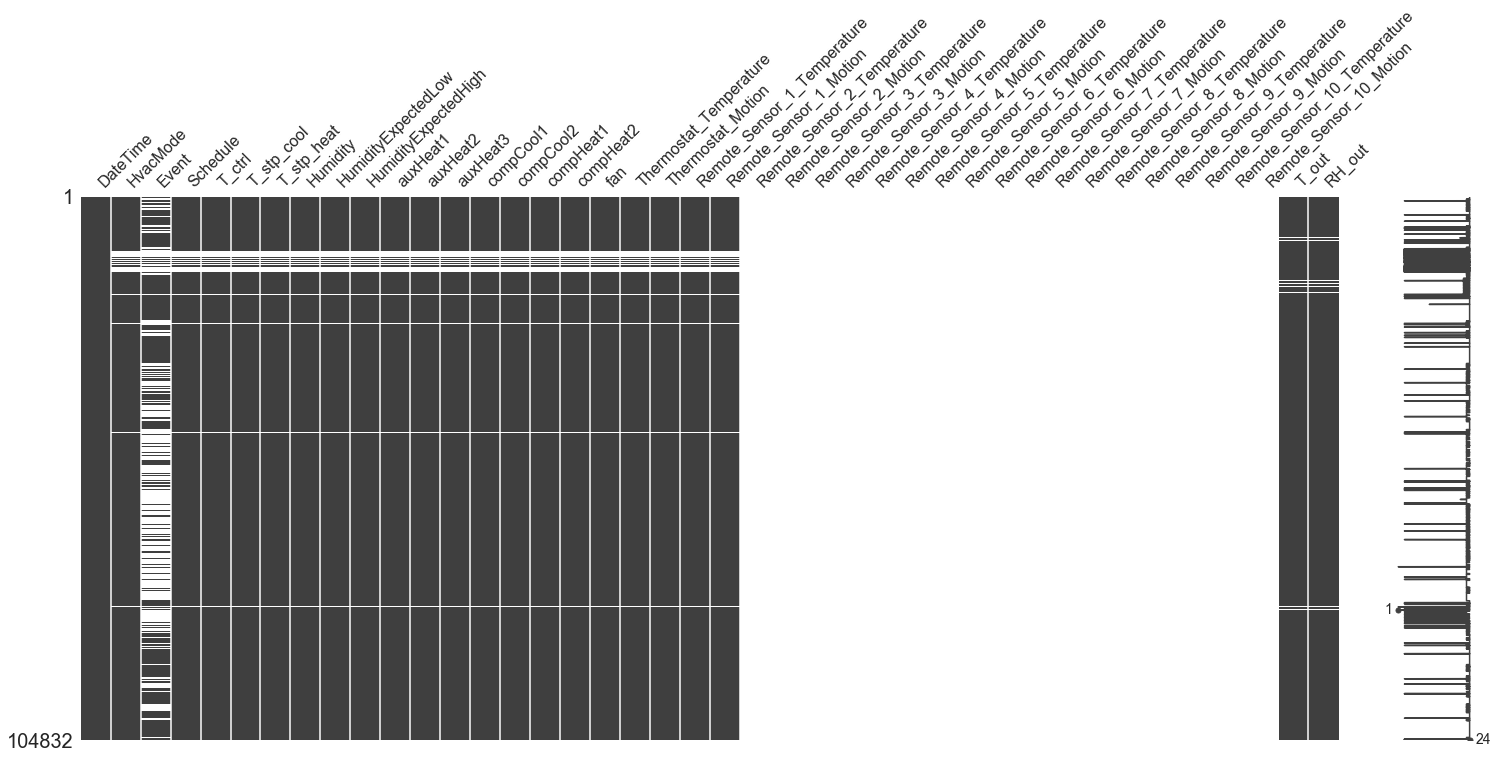

In [355]:
#Lets Visualize the null values in the dataset
msno.matrix(house_data)
#msno.bar(house_data)

In [356]:
#Cheking null values and removing them for further analysis
house_data.isnull().sum()

DateTime                             0
HvacMode                          3085
Event                            49631
Schedule                          3085
T_ctrl                            3085
T_stp_cool                        3085
T_stp_heat                        3085
Humidity                          3085
HumidityExpectedLow               3085
HumidityExpectedHigh              3085
auxHeat1                          3070
auxHeat2                          3070
auxHeat3                          3070
compCool1                         3070
compCool2                         3070
compHeat1                         3070
compHeat2                         3070
fan                               3070
Thermostat_Temperature            3073
Thermostat_Motion                 3073
Remote_Sensor_1_Temperature       3073
Remote_Sensor_1_Motion            3073
Remote_Sensor_2_Temperature     104832
Remote_Sensor_2_Motion          104832
Remote_Sensor_3_Temperature     104832
Remote_Sensor_3_Motion   

In [357]:
#Removing the columns with no values
house_data = house_data.drop(labels = ['Remote_Sensor_2_Temperature', 'Remote_Sensor_2_Motion',
                                       'Remote_Sensor_3_Temperature', 'Remote_Sensor_3_Motion', 
                                       'Remote_Sensor_4_Temperature', 'Remote_Sensor_4_Motion', 
                                       'Remote_Sensor_5_Temperature', 'Remote_Sensor_5_Motion', 
                                       'Remote_Sensor_6_Temperature', 'Remote_Sensor_6_Motion', 
                                       'Remote_Sensor_7_Temperature', 'Remote_Sensor_7_Motion', 
                                       'Remote_Sensor_8_Temperature', 'Remote_Sensor_8_Motion', 
                                       'Remote_Sensor_9_Temperature', 'Remote_Sensor_9_Motion', 
                                       'Remote_Sensor_10_Temperature', 'Remote_Sensor_10_Motion'], 
                             axis = 1)

In [358]:
house_data.isnull().sum()

DateTime                           0
HvacMode                        3085
Event                          49631
Schedule                        3085
T_ctrl                          3085
T_stp_cool                      3085
T_stp_heat                      3085
Humidity                        3085
HumidityExpectedLow             3085
HumidityExpectedHigh            3085
auxHeat1                        3070
auxHeat2                        3070
auxHeat3                        3070
compCool1                       3070
compCool2                       3070
compHeat1                       3070
compHeat2                       3070
fan                             3070
Thermostat_Temperature          3073
Thermostat_Motion               3073
Remote_Sensor_1_Temperature     3073
Remote_Sensor_1_Motion          3073
T_out                           1152
RH_out                          1152
dtype: int64

In [359]:
# Removing Null Values
house_data = house_data.drop(house_data[house_data['HvacMode'].isnull()].index.tolist())
house_data = house_data.drop(house_data[house_data['RH_out'].isnull()].index.tolist())

In [360]:
#Filling Nan values to None in the Event Column
house_date = house_data["Event"].fillna("None", inplace = True)

In [361]:
#dropping summer months usage by having only heating system
house_data = house_data.drop(house_data[house_data['HvacMode'] == 'cool'].index.tolist())
house_data = house_data.drop(house_data[house_data['HvacMode'] == 'auto'].index.tolist())
house_data = house_data.drop(house_data[house_data['HvacMode'] == 'off'].index.tolist())

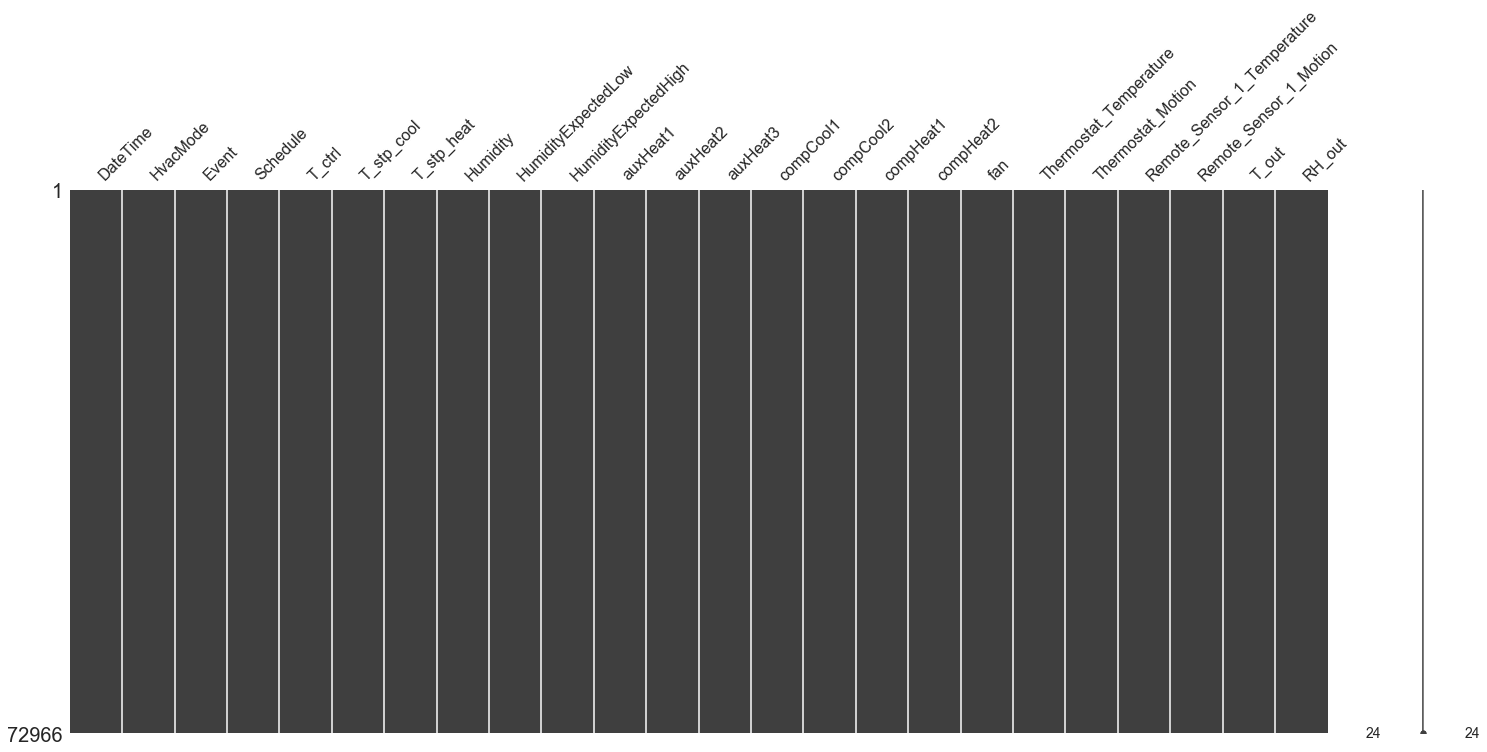

In [362]:
msno.matrix(house_data)
#msno.bar(house_data)

In [363]:
house_data.isnull().sum()

DateTime                       0
HvacMode                       0
Event                          0
Schedule                       0
T_ctrl                         0
T_stp_cool                     0
T_stp_heat                     0
Humidity                       0
HumidityExpectedLow            0
HumidityExpectedHigh           0
auxHeat1                       0
auxHeat2                       0
auxHeat3                       0
compCool1                      0
compCool2                      0
compHeat1                      0
compHeat2                      0
fan                            0
Thermostat_Temperature         0
Thermostat_Motion              0
Remote_Sensor_1_Temperature    0
Remote_Sensor_1_Motion         0
T_out                          0
RH_out                         0
dtype: int64

#### Feature Engineering

In [364]:
#We will start working on DateTime Feature

In [365]:
house_data['DateTime'] = pd.to_datetime(house_data['DateTime'])

In [366]:
house_data["date"] = [d.date() for d in house_data["DateTime"]]


In [367]:
house_data["date"]

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
104827    2019-12-31
104828    2019-12-31
104829    2019-12-31
104830    2019-12-31
104831    2019-12-31
Name: date, Length: 72966, dtype: object

In [368]:
house_data['date']

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
104827    2019-12-31
104828    2019-12-31
104829    2019-12-31
104830    2019-12-31
104831    2019-12-31
Name: date, Length: 72966, dtype: object

In [369]:
weekDays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [370]:
house_data['Month'] = pd.DatetimeIndex(house_data['DateTime']).month
house_data['DayOfWeek'] = pd.DatetimeIndex(house_data['DateTime']).dayofweek
house_data['HourofDay'] = pd.DatetimeIndex(house_data['DateTime']).hour
house_data['Day'] = pd.DatetimeIndex(house_data['DateTime']).day

In [371]:
house_data.columns

Index(['DateTime', 'HvacMode', 'Event', 'Schedule', 'T_ctrl', 'T_stp_cool',
       'T_stp_heat', 'Humidity', 'HumidityExpectedLow', 'HumidityExpectedHigh',
       'auxHeat1', 'auxHeat2', 'auxHeat3', 'compCool1', 'compCool2',
       'compHeat1', 'compHeat2', 'fan', 'Thermostat_Temperature',
       'Thermostat_Motion', 'Remote_Sensor_1_Temperature',
       'Remote_Sensor_1_Motion', 'T_out', 'RH_out', 'date', 'Month',
       'DayOfWeek', 'HourofDay', 'Day'],
      dtype='object')

In [372]:
#Rearranging Columns for readability
house_data = house_data[['Month', 'DayOfWeek','HourofDay', 'Day','DateTime','date', 'HvacMode',
                         'Event', 'Schedule', 'T_ctrl', 'T_stp_cool',
                         'T_stp_heat', 'Humidity', 'HumidityExpectedLow', 'HumidityExpectedHigh',
                         'auxHeat1', 'auxHeat2', 'auxHeat3', 'compCool1', 'compCool2',
                         'compHeat1', 'compHeat2', 'fan', 'Thermostat_Temperature',
                         'Thermostat_Motion', 'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion', 'T_out', 'RH_out']]

In [373]:
house_data.head()

Month  DayOfWeek  HourofDay  Day            DateTime        date HvacMode  \
0      1          1          0    1 2019-01-01 00:00:00  2019-01-01     heat   
1      1          1          0    1 2019-01-01 00:05:00  2019-01-01     heat   
2      1          1          0    1 2019-01-01 00:10:00  2019-01-01     heat   
3      1          1          0    1 2019-01-01 00:15:00  2019-01-01     heat   
4      1          1          0    1 2019-01-01 00:20:00  2019-01-01     heat   

  Event Schedule  T_ctrl  ...  compCool2  compHeat1  compHeat2    fan  \
0  Hold    Sleep    70.0  ...        0.0        0.0        0.0  165.0   
1  Hold    Sleep    70.0  ...        0.0        0.0        0.0  135.0   
2  Hold    Sleep    70.0  ...        0.0        0.0        0.0  300.0   
3  Hold    Sleep    70.0  ...        0.0        0.0        0.0  180.0   
4  Hold    Sleep    70.0  ...        0.0        0.0        0.0  120.0   

   Thermostat_Temperature  Thermostat_Motion  Remote_Sensor_1_Temperature  \
0                    70.0                0.0                         67.0   
1                    70.0                0.0                         67.0   
2                    70.0                0.0                         67.0   
3                    70.0                0.0                         67.0   
4                    70.0                0.0                         67.0   

   Remote_Sensor_1_Motion  T_out  RH_out  
0                     0.0   41.0    95.0  
1                     0.0   41.0    95.0  
2                     0.0   41.0    95.0  
3                     0.0   41.0    95.0  
4                     0.0   41.0    95.0  

[5 rows x 29 columns]

In [377]:
house_data.set_index('date',inplace=True) 

In [378]:
house_data.head()

Month  DayOfWeek  HourofDay  Day            DateTime HvacMode  \
date                                                                        
2019-01-01      1          1          0    1 2019-01-01 00:00:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:05:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:10:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:15:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:20:00     heat   

           Event Schedule  T_ctrl  T_stp_cool  ...  compCool2  compHeat1  \
date                                           ...                         
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   

            compHeat2    fan  Thermostat_Temperature  Thermostat_Motion  \
date                                                                      
2019-01-01        0.0  165.0                    70.0                0.0   
2019-01-01        0.0  135.0                    70.0                0.0   
2019-01-01        0.0  300.0                    70.0                0.0   
2019-01-01        0.0  180.0                    70.0                0.0   
2019-01-01        0.0  120.0                    70.0                0.0   

            Remote_Sensor_1_Temperature  Remote_Sensor_1_Motion  T_out  RH_out  
date                                                                            
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  

[5 rows x 28 columns]

In [271]:
house_data.HvacMode.unique()

array(['heat'], dtype=object)

In [272]:
house_data.HourofDay.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [273]:
house_data.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  9, 10, 11, 12])

In [274]:
house_data.DayOfWeek.unique()

array([1, 2, 3, 4, 5, 6, 0])

In [275]:
house_data.Day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [276]:
house_data.auxHeat1.unique()

array([  0.,  30., 300., 135., 210., 285.,  60., 120.,  75., 105., 195.,
        15., 165., 270.,  90., 150., 225.,  45., 255., 180., 240.])

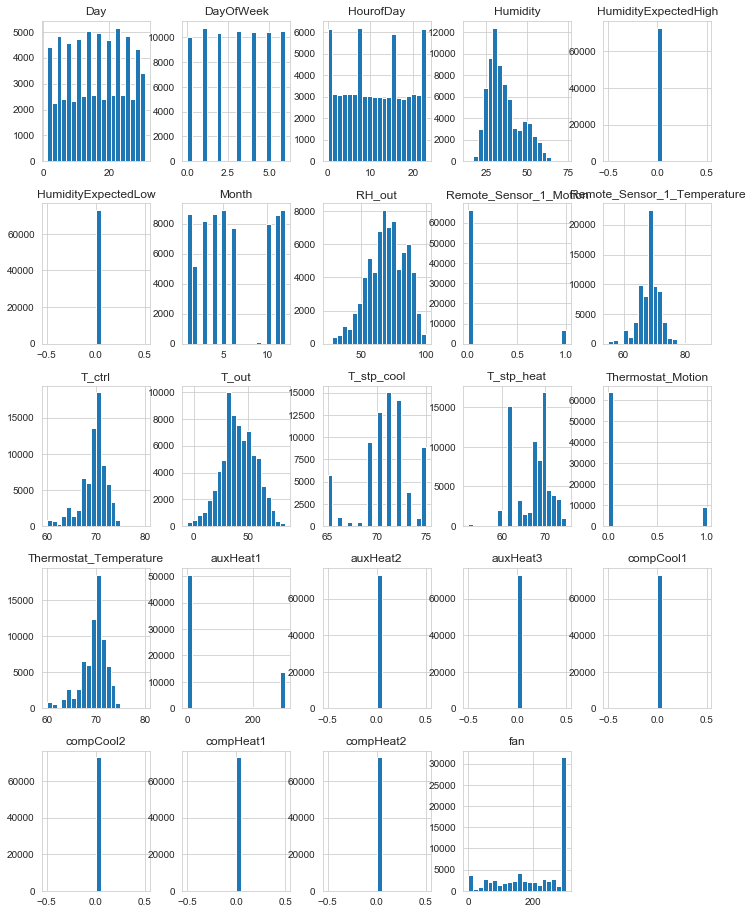

In [277]:
house_data.hist(bins = 20 , figsize= (12,16)) ;

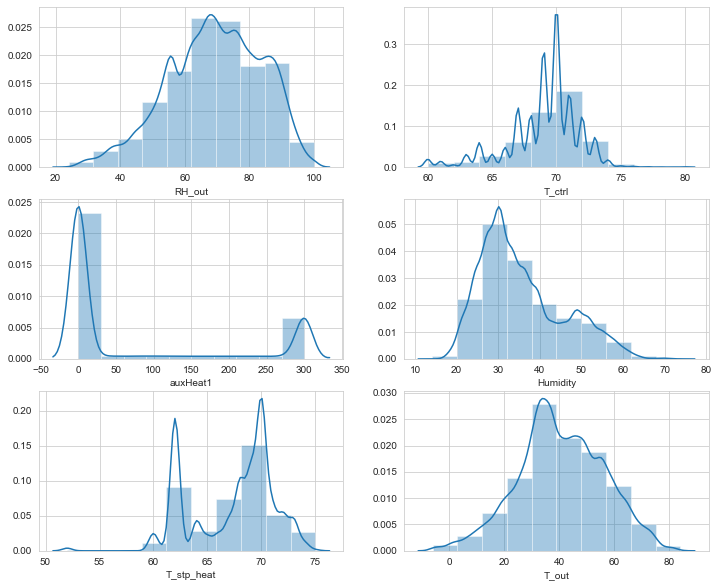

In [284]:
# focussed displots 
f, ax = plt.subplots(3,2,figsize=(12,10))
vis1 = sns.distplot(house_data["RH_out"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(house_data["T_ctrl"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(house_data["auxHeat1"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(house_data["Humidity"],bins=10, ax=ax[1][1])
vis5 = sns.distplot(house_data["T_stp_heat"],bins=10, ax=ax[2][0])
vis5 = sns.distplot(house_data["T_out"],bins=10, ax=ax[2][1])

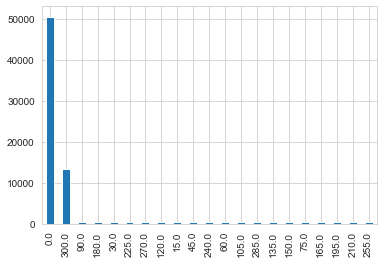

In [184]:
#Lets check the count of each value in auxHeat1 variable

house_data["auxHeat1"].value_counts().plot.bar()
plt.show()

In [185]:
temp_df = house_data.copy()

In [186]:
temp_df.head()

Month  DayOfWeek  HourofDay  Day            DateTime HvacMode  \
date                                                                        
2019-01-01      1          1          0    1 2019-01-01 00:00:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:05:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:10:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:15:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:20:00     heat   

           Event Schedule  T_ctrl  T_stp_cool  ...  compCool2  compHeat1  \
date                                           ...                         
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   

            compHeat2    fan  Thermostat_Temperature  Thermostat_Motion  \
date                                                                      
2019-01-01        0.0  165.0                    70.0                0.0   
2019-01-01        0.0  135.0                    70.0                0.0   
2019-01-01        0.0  300.0                    70.0                0.0   
2019-01-01        0.0  180.0                    70.0                0.0   
2019-01-01        0.0  120.0                    70.0                0.0   

            Remote_Sensor_1_Temperature  Remote_Sensor_1_Motion  T_out  RH_out  
date                                                                            
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  

[5 rows x 28 columns]

In [187]:
temp_df = temp_df[temp_df['auxHeat1'] != 300]
temp_df = temp_df[temp_df['auxHeat1'] != 0]

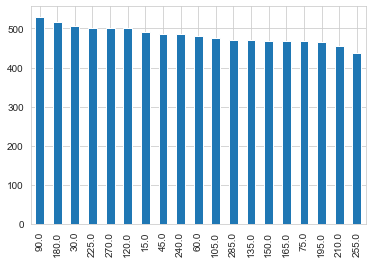

In [188]:
# temprary dataset after removing 0 and 300 value from the dataset
temp_df["auxHeat1"].value_counts().plot.bar()
plt.show()

In [296]:
print('Percentage of the Heat Source Run time is less than 300 seconds')
N=house_data[house_data['auxHeat1'] <= 300].shape[0]
print(N)
D=(len(house_data))*100 
print(D)
r=N/D
r

Percentage of the Heat Source Run time is less than 300 seconds
72966
7296600


0.01

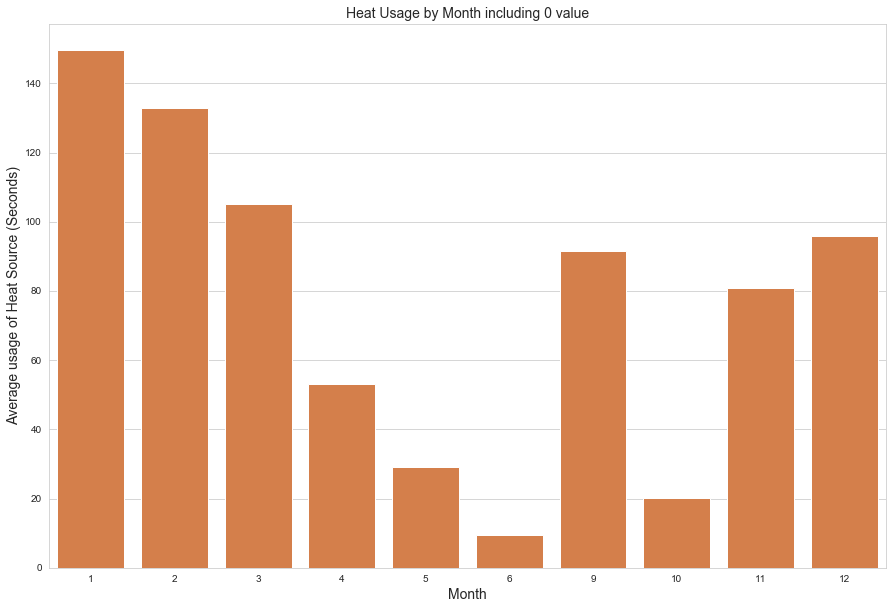

In [190]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn barplot
heatUsage = sns.barplot(data = house_data, x = 'Month', y = 'auxHeat1', color = '#eb7a34', ci=None)

heatUsage.set_xlabel("Month", fontsize = 14)
heatUsage.set_ylabel('Average usage of Heat Source (Seconds)', fontsize = 14)
heatUsage.ticklabel_format
plt.title('Heat Usage by Month including 0 value', fontsize = 14)
plt.show()

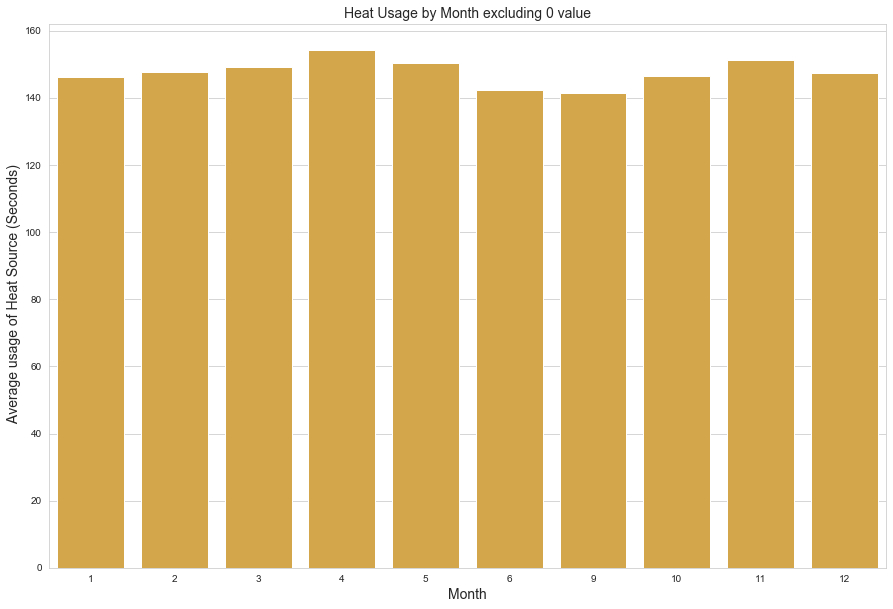

In [191]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn barplot
heatUsage = sns.barplot(data = temp_df, x = 'Month', y = 'auxHeat1', color = '#ebae34', ci=None)

heatUsage.set_xlabel("Month", fontsize = 14)
heatUsage.set_ylabel(' Average usage of Heat Source (Seconds)', fontsize = 14)
plt.title('Heat Usage by Month excluding 0 value', fontsize = 14)
plt.show()

In [192]:
#house_data = house_data[house_data['auxHeat1'] != 300]

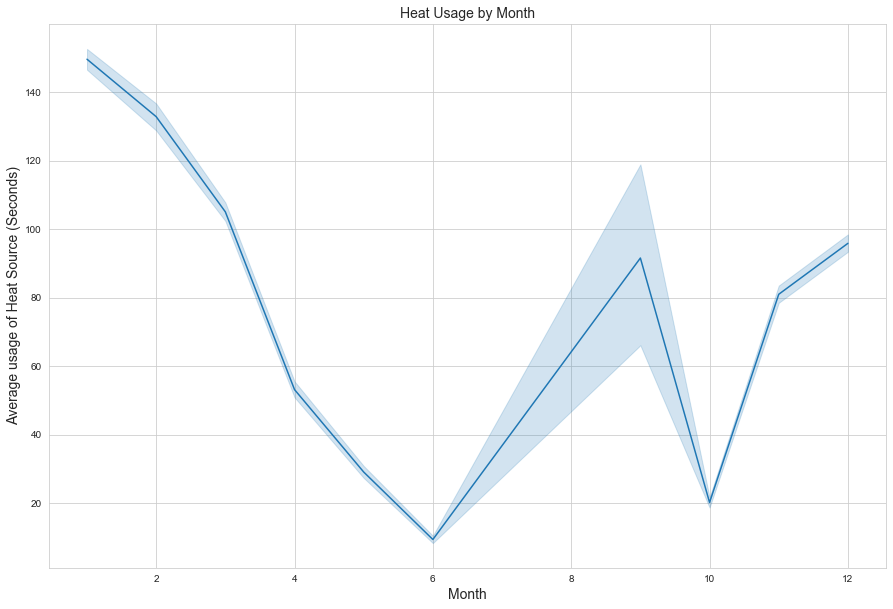

In [193]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn Lineplot
heatUsage = sns.lineplot(x = 'Month', y = 'auxHeat1', data=house_data)

heatUsage.set_xlabel("Month", fontsize = 14)
heatUsage.set_ylabel('Average usage of Heat Source (Seconds)', fontsize = 14)
plt.title('Heat Usage by Month', fontsize = 14)
plt.show()

In [194]:
temp_df['Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [195]:
temp_df.head()

Month  DayOfWeek  HourofDay  Day            DateTime HvacMode  \
date                                                                        
2019-01-01      1          1          0    1 2019-01-01 00:05:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:15:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:40:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:45:00     heat   
2019-01-01      1          1          1    1 2019-01-01 01:10:00     heat   

           Event Schedule  T_ctrl  T_stp_cool  ...  compCool2  compHeat1  \
date                                           ...                         
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   

            compHeat2    fan  Thermostat_Temperature  Thermostat_Motion  \
date                                                                      
2019-01-01        0.0  135.0                    70.0                0.0   
2019-01-01        0.0  180.0                    70.0                0.0   
2019-01-01        0.0  300.0                    70.0                0.0   
2019-01-01        0.0  300.0                    70.0                0.0   
2019-01-01        0.0  300.0                    70.0                0.0   

            Remote_Sensor_1_Temperature  Remote_Sensor_1_Motion  T_out  RH_out  
date                                                                            
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   42.0    96.0  
2019-01-01                         66.0                     0.0   42.0    96.0  
2019-01-01                         67.0                     0.0   42.0    94.0  

[5 rows x 28 columns]

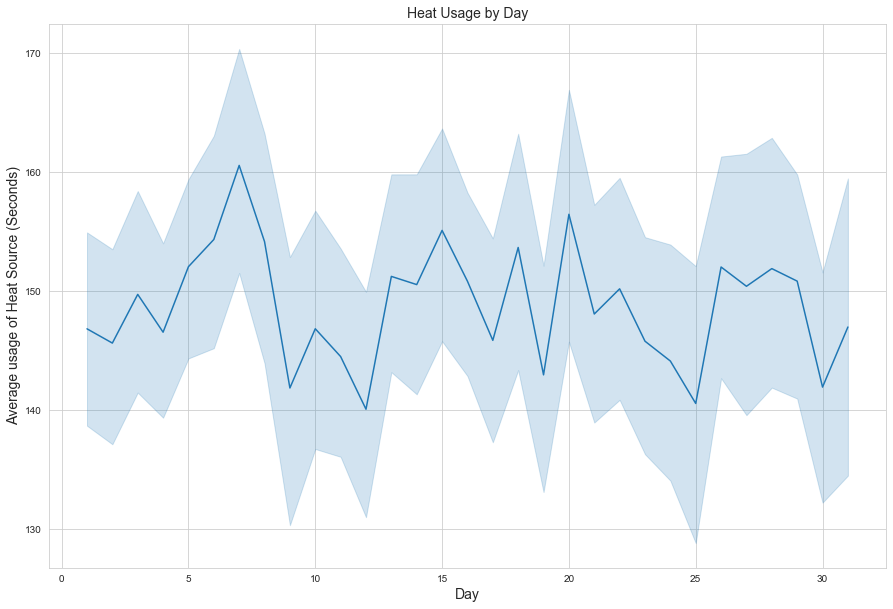

In [196]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn Lineplot
heatUsage = sns.lineplot(x = 'Day', y = 'auxHeat1', data=temp_df)

heatUsage.set_xlabel("Day", fontsize = 14)
heatUsage.set_ylabel('Average usage of Heat Source (Seconds)', fontsize = 14)
plt.title('Heat Usage by Day', fontsize = 14)
plt.show()

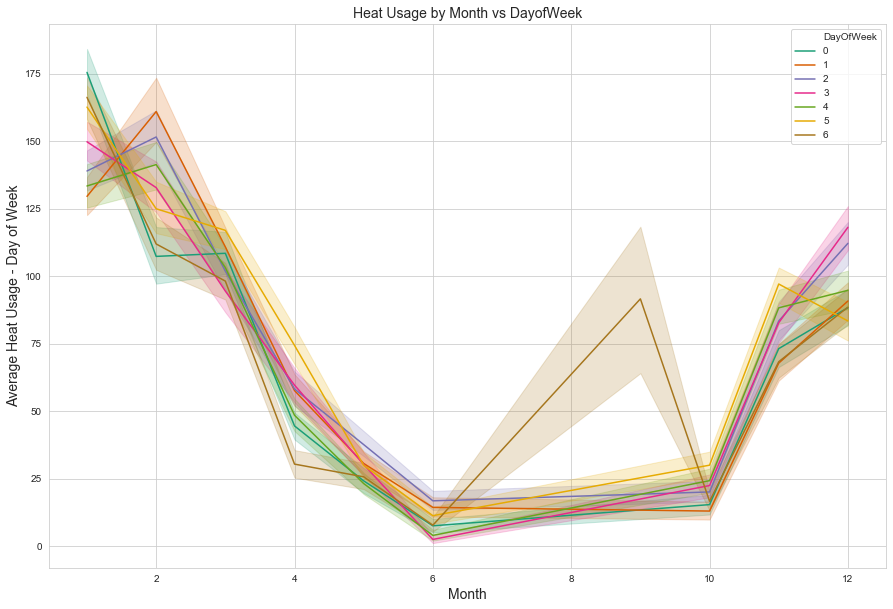

In [197]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn Lineplot
heatUsage = sns.lineplot(x="Month", y="auxHeat1", data=house_data, hue="DayOfWeek", palette="Dark2")

heatUsage.set_xlabel("Month", fontsize = 14)
heatUsage.set_ylabel('Average Heat Usage - Day of Week', fontsize = 14)
plt.title('Heat Usage by Month vs DayofWeek', fontsize = 14)
plt.show()


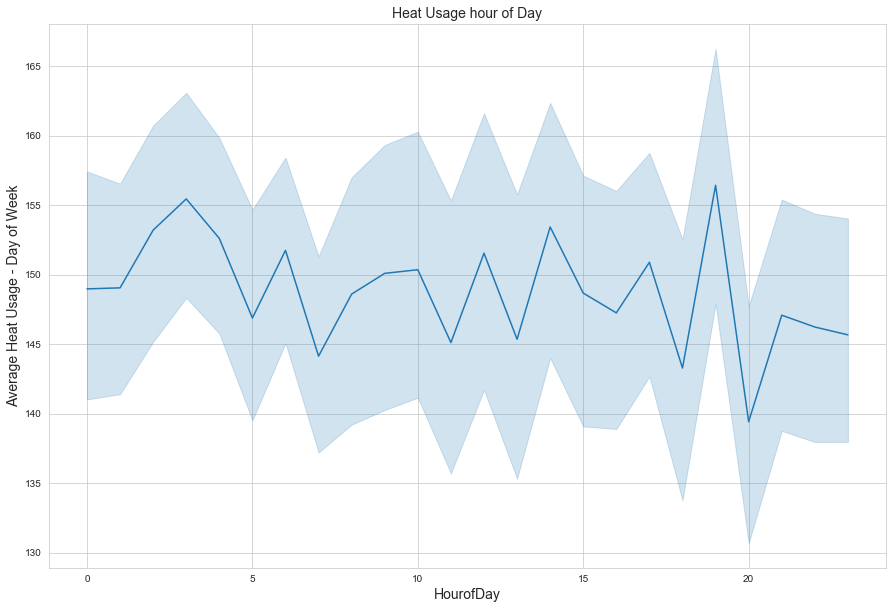

In [198]:
plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

#Using Seaborn Lineplot
heatUsage = sns.lineplot(x="HourofDay", y="auxHeat1", data=temp_df)

heatUsage.set_xlabel("HourofDay", fontsize = 14)
heatUsage.set_ylabel('Average Heat Usage - Day of Week', fontsize = 14)
plt.title('Heat Usage hour of Day', fontsize = 14)
plt.show()



In [199]:
house_data.head(10)

Month  DayOfWeek  HourofDay  Day            DateTime HvacMode  \
date                                                                        
2019-01-01      1          1          0    1 2019-01-01 00:00:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:05:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:10:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:15:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:20:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:25:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:30:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:35:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:40:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:45:00     heat   

           Event Schedule  T_ctrl  T_stp_cool  ...  compCool2  compHeat1  \
date                                           ...                         
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   

            compHeat2    fan  Thermostat_Temperature  Thermostat_Motion  \
date                                                                      
2019-01-01        0.0  165.0                    70.0                0.0   
2019-01-01        0.0  135.0                    70.0                0.0   
2019-01-01        0.0  300.0                    70.0                0.0   
2019-01-01        0.0  180.0                    70.0                0.0   
2019-01-01        0.0  120.0                    70.0                0.0   
2019-01-01        0.0  300.0                    70.0                0.0   
2019-01-01        0.0  165.0                    70.0                0.0   
2019-01-01        0.0  135.0                    70.0                0.0   
2019-01-01        0.0  300.0                    70.0                0.0   
2019-01-01        0.0  300.0                    70.0                0.0   

            Remote_Sensor_1_Temperature  Remote_Sensor_1_Motion  T_out  RH_out  
date                                                                            
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   41.0    95.0  
2019-01-01                         67.0                     0.0   42.0    96.0  
2019-01-01                         67.0                     0.0   42.0    96.0  
2019-01-01                         67.0                     0.0   42.0    96.0  
2019-01-01                         66.0                     0.0   42.0    96.0  

[10 rows x 28 columns]

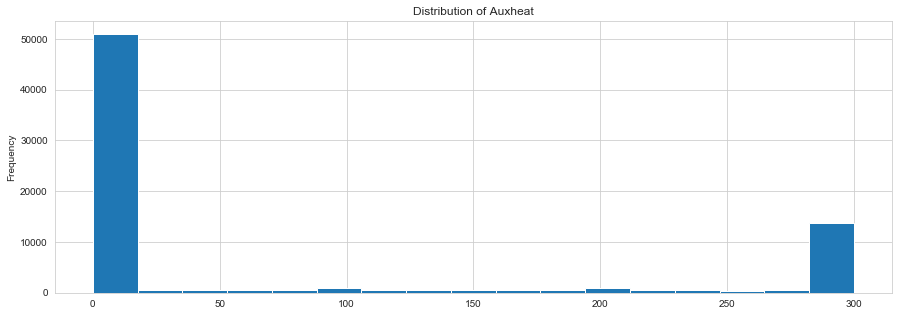

In [200]:
x = house_data['auxHeat1'].plot.hist(figsize=(15, 5), bins=17, title='Distribution of Auxheat')

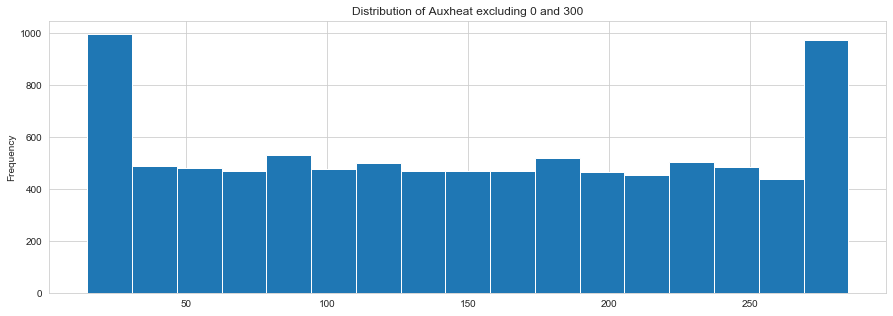

In [201]:
c = temp_df['auxHeat1'].plot.hist(figsize=(15, 5), bins=17, title='Distribution of Auxheat excluding 0 and 300')

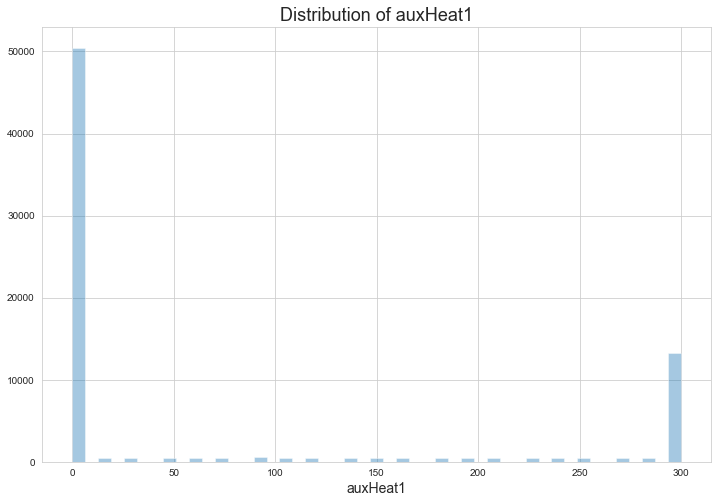

In [202]:
plt.figure(figsize = (12,8))
sns.distplot(house_data.auxHeat1.values, kde = False)
plt.xlabel('auxHeat1', fontsize = 14)
plt.title('Distribution of auxHeat1', fontsize = 18)
plt.show()

In [204]:
house_data['auxHeat1']

date
2019-01-01      0.0
2019-01-01     30.0
2019-01-01    300.0
2019-01-01    135.0
2019-01-01      0.0
              ...  
2019-12-31      0.0
2019-12-31      0.0
2019-12-31      0.0
2019-12-31      0.0
2019-12-31     90.0
Name: auxHeat1, Length: 72966, dtype: float64

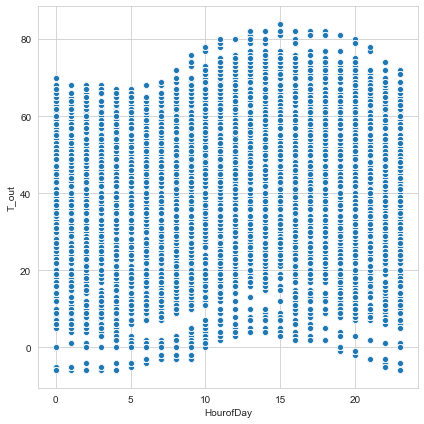

In [207]:
plt.figure(figsize=(6,6))
b = sns.scatterplot(x = house_data['HourofDay'], y = house_data['T_out']);


plt.tight_layout()

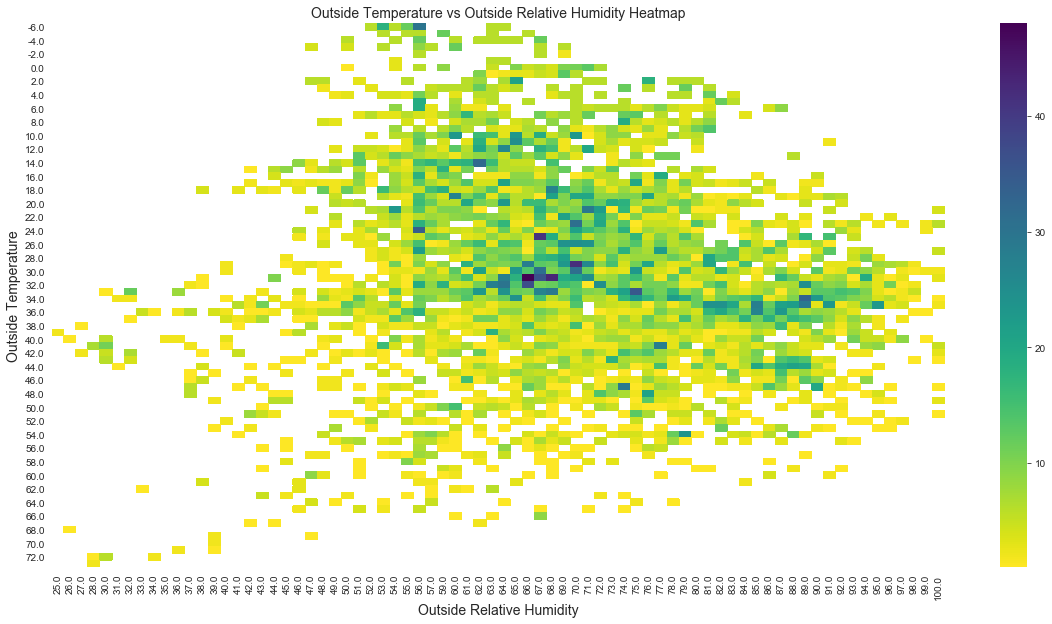

In [52]:
daily_activity_member = house_data[house_data['auxHeat1'] == 300.0].groupby(by = ['T_out', 'RH_out']).count()['auxHeat1'].unstack()

plt.figure(figsize = (20, 10))

sns.heatmap(daily_activity_member, cmap = 'viridis_r')

plt.title('Outside Temperature vs Outside Relative Humidity Heatmap', fontsize = 14)
plt.xlabel('Outside Relative Humidity', fontsize = 14)
plt.ylabel('Outside Temperature', fontsize = 14)
plt.show()

In [303]:
corr = house_data.corr()
corr

Month  DayOfWeek  HourofDay       Day  \
Month                        1.000000  -0.005346   0.012369  0.024760   
DayOfWeek                   -0.005346   1.000000  -0.001799 -0.014480   
HourofDay                    0.012369  -0.001799   1.000000  0.001612   
Day                          0.024760  -0.014480   0.001612  1.000000   
T_ctrl                      -0.198850   0.080460   0.075700 -0.066508   
T_stp_cool                  -0.233130  -0.085438   0.051503 -0.030275   
T_stp_heat                  -0.116458   0.102159   0.082944 -0.110492   
Humidity                     0.284111  -0.037263   0.016658  0.033979   
HumidityExpectedLow               NaN        NaN        NaN       NaN   
HumidityExpectedHigh              NaN        NaN        NaN       NaN   
auxHeat1                    -0.140032   0.008945  -0.052622 -0.034260   
auxHeat2                          NaN        NaN        NaN       NaN   
auxHeat3                          NaN        NaN        NaN       NaN   
compCool1                         NaN        NaN        NaN       NaN   
compCool2                         NaN        NaN        NaN       NaN   
compHeat1                         NaN        NaN        NaN       NaN   
compHeat2                         NaN        NaN        NaN       NaN   
fan                         -0.037938  -0.005868  -0.005959  0.003416   
Thermostat_Temperature      -0.215879   0.076356   0.056967 -0.070939   
Thermostat_Motion           -0.011039   0.076336   0.144609 -0.022307   
Remote_Sensor_1_Temperature -0.050358   0.071433   0.079393 -0.068875   
Remote_Sensor_1_Motion       0.037553   0.023508   0.112295  0.001169   
T_out                        0.168977  -0.006678   0.102065  0.044305   
RH_out                       0.199510   0.008988  -0.191468  0.039594   

                               T_ctrl  T_stp_cool  T_stp_heat  Humidity  \
Month                       -0.198850   -0.233130   -0.116458  0.284111   
DayOfWeek                    0.080460   -0.085438    0.102159 -0.037263   
HourofDay                    0.075700    0.051503    0.082944  0.016658   
Day                         -0.066508   -0.030275   -0.110492  0.033979   
T_ctrl                       1.000000    0.339892    0.560879 -0.008602   
T_stp_cool                   0.339892    1.000000    0.054490  0.087643   
T_stp_heat                   0.560879    0.054490    1.000000 -0.326122   
Humidity                    -0.008602    0.087643   -0.326122  1.000000   
HumidityExpectedLow               NaN         NaN         NaN       NaN   
HumidityExpectedHigh              NaN         NaN         NaN       NaN   
auxHeat1                     0.052202   -0.005387    0.335274 -0.340204   
auxHeat2                          NaN         NaN         NaN       NaN   
auxHeat3                          NaN         NaN         NaN       NaN   
compCool1                         NaN         NaN         NaN       NaN   
compCool2                         NaN         NaN         NaN       NaN   
compHeat1                         NaN         NaN         NaN       NaN   
compHeat2                         NaN         NaN         NaN       NaN   
fan                         -0.029670    0.021855    0.031610 -0.040777   
Thermostat_Temperature       0.979965    0.343244    0.580611 -0.044180   
Thermostat_Motion            0.134367    0.034463    0.175682  0.030388   
Remote_Sensor_1_Temperature  0.718586    0.299874    0.247739  0.178709   
Remote_Sensor_1_Motion       0.101305   -0.009634    0.105378  0.000627   
T_out                        0.095361    0.057417   -0.307948  0.767964   
RH_out                      -0.157483   -0.140149   -0.004516  0.087131   

                             HumidityExpectedLow  HumidityExpectedHigh  ...  \
Month                                        NaN                   NaN  ...   
DayOfWeek                                    NaN                   NaN  ...   
HourofDay                                    NaN                   NaN  ...   
Day           

In [310]:
house_data_corr=house_data[['Month', 'DayOfWeek','HourofDay', 'Day','DateTime', 'HvacMode',
                         'Event', 'Schedule', 'T_ctrl', 'T_stp_cool',
                         'T_stp_heat', 'Humidity',
                         'auxHeat1', 'fan', 'Thermostat_Temperature',
                         'Thermostat_Motion', 'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion', 'T_out', 'RH_out']]

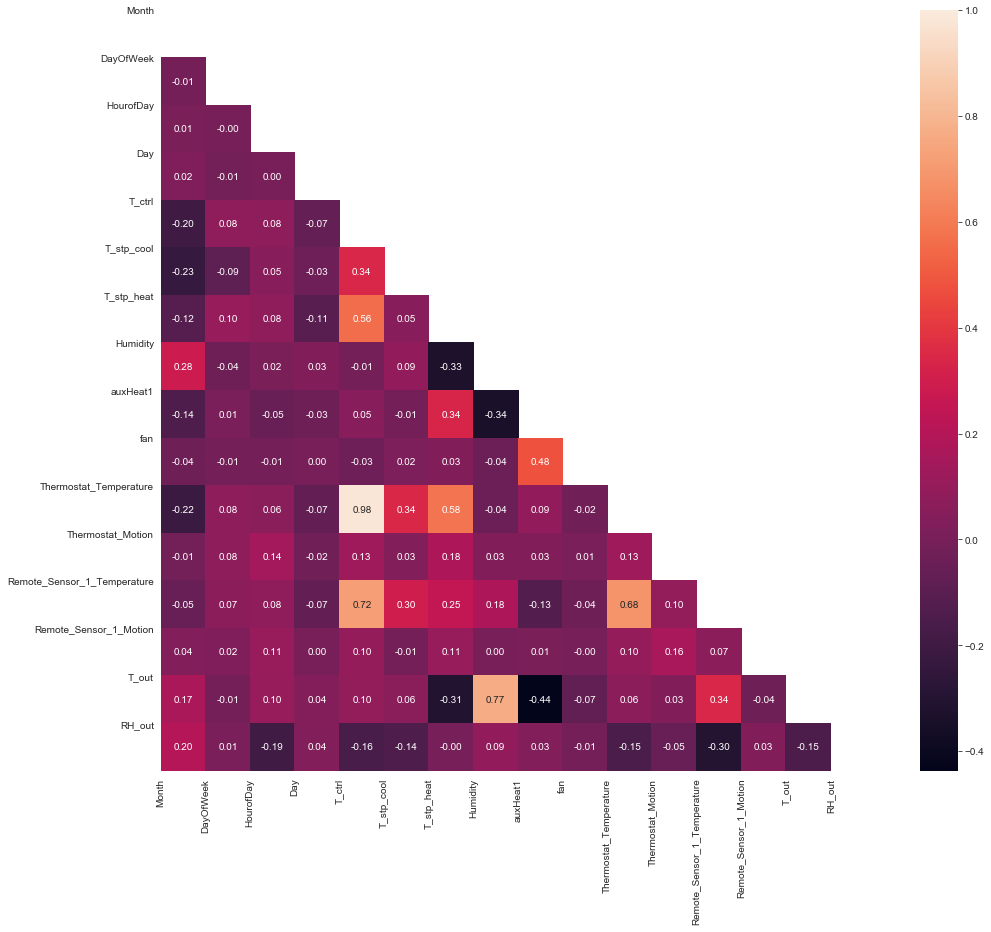

In [311]:

corr = house_data_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [489]:
au_corr = house_data_corr.corr().abs().unstack()
labels_to_drop = get_redundant_pairs(house_data_corr)
# print(labels_to_drop)
au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)

KeyError: ('T_ctrl', 'Schedule')

In [490]:
corr = house_data_corr.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

RH_out                  RH_out                    1.000000
T_out                   T_out                     1.000000
DayOfWeek               DayOfWeek                 1.000000
HourofDay               HourofDay                 1.000000
Day                     Day                       1.000000
                                                    ...   
HourofDay               Day                       0.001612
Day                     Remote_Sensor_1_Motion    0.001169
Remote_Sensor_1_Motion  Day                       0.001169
Humidity                Remote_Sensor_1_Motion    0.000627
Remote_Sensor_1_Motion  Humidity                  0.000627
Length: 256, dtype: float64

In [481]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = house_data_corr.columns
    for i in range(0, house_data_corr.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(house_data_corr, 40))

Top Absolute Correlations


KeyError: ('T_ctrl', 'Schedule')

In [316]:
get_redundant_pairs(house_data_corr)

{('DateTime', 'DateTime'),
 ('DateTime', 'Day'),
 ('DateTime', 'DayOfWeek'),
 ('DateTime', 'HourofDay'),
 ('DateTime', 'Month'),
 ('Day', 'Day'),
 ('Day', 'DayOfWeek'),
 ('Day', 'HourofDay'),
 ('Day', 'Month'),
 ('DayOfWeek', 'DayOfWeek'),
 ('DayOfWeek', 'Month'),
 ('Event', 'DateTime'),
 ('Event', 'Day'),
 ('Event', 'DayOfWeek'),
 ('Event', 'Event'),
 ('Event', 'HourofDay'),
 ('Event', 'HvacMode'),
 ('Event', 'Month'),
 ('HourofDay', 'DayOfWeek'),
 ('HourofDay', 'HourofDay'),
 ('HourofDay', 'Month'),
 ('Humidity', 'DateTime'),
 ('Humidity', 'Day'),
 ('Humidity', 'DayOfWeek'),
 ('Humidity', 'Event'),
 ('Humidity', 'HourofDay'),
 ('Humidity', 'Humidity'),
 ('Humidity', 'HvacMode'),
 ('Humidity', 'Month'),
 ('Humidity', 'Schedule'),
 ('Humidity', 'T_ctrl'),
 ('Humidity', 'T_stp_cool'),
 ('Humidity', 'T_stp_heat'),
 ('HvacMode', 'DateTime'),
 ('HvacMode', 'Day'),
 ('HvacMode', 'DayOfWeek'),
 ('HvacMode', 'HourofDay'),
 ('HvacMode', 'HvacMode'),
 ('HvacMode', 'Month'),
 ('Month', 'Month'),

In [320]:
def month2seasons(x):
    if x in [12, 1, 2]:
        season = 'Winter'
    elif x in [3, 4, 5]:
        season = 'Spring'
    elif x in [6, 7, 8, 9]:
        season = 'Summer'
    elif x in [10, 11]:
        season = 'Fall'
    return season

In [326]:
house_data['Season'] = house_data['Month'].apply(month2seasons)
house_data.head(3)

Month  DayOfWeek  HourofDay  Day            DateTime HvacMode  \
date                                                                        
2019-01-01      1          1          0    1 2019-01-01 00:00:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:05:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:10:00     heat   

           Event Schedule  T_ctrl  T_stp_cool  ...  compHeat2    fan  \
date                                           ...                     
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0  165.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0  135.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0  300.0   

            Thermostat_Temperature  Thermostat_Motion  \
date                                                    
2019-01-01                    70.0                0.0   
2019-01-01                    70.0                0.0   
2019-01-01                    70.0                0.0   

            Remote_Sensor_1_Temperature  Remote_Sensor_1_Motion  T_out  \
date                                                                     
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   

            RH_out  season  Season  
date                                
2019-01-01    95.0  Winter  Winter  
2019-01-01    95.0  Winter  Winter  
2019-01-01    95.0  Winter  Winter  

[3 rows x 30 columns]

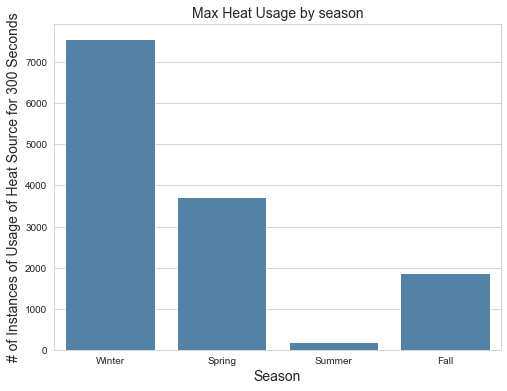

In [331]:
plt.figure(figsize = (8, 6))
sns.set_style('whitegrid')

#Using Seaborn Countplot
heatUsage = sns.countplot(data = house_data[house_data['auxHeat1'] == 300.0], x = 'Season', color = 'steelblue')


heatUsage.set_xlabel("Season", fontsize = 14)
heatUsage.set_ylabel('# of Instances of Usage of Heat Source for 300 Seconds', fontsize = 14)
plt.title('Max Heat Usage by season', fontsize = 14)
plt.show()

In [327]:
def hours2timing(x):
    if x in [22,23,0,1,2,3]:
        timing = 'Night'
    elif x in range(4, 12):
        timing = 'Morning'
    elif x in range(12, 17):
        timing = 'Afternoon'
    elif x in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

In [328]:
house_data['timing'] = house_data['HourofDay'].apply(hours2timing)
house_data.head(3)

Month  DayOfWeek  HourofDay  Day            DateTime HvacMode  \
date                                                                        
2019-01-01      1          1          0    1 2019-01-01 00:00:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:05:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:10:00     heat   

           Event Schedule  T_ctrl  T_stp_cool  ...    fan  \
date                                           ...          
2019-01-01  Hold    Sleep    70.0        70.0  ...  165.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...  135.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...  300.0   

            Thermostat_Temperature  Thermostat_Motion  \
date                                                    
2019-01-01                    70.0                0.0   
2019-01-01                    70.0                0.0   
2019-01-01                    70.0                0.0   

            Remote_Sensor_1_Temperature  Remote_Sensor_1_Motion  T_out  \
date                                                                     
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   

            RH_out  season  Season  timing  
date                                        
2019-01-01    95.0  Winter  Winter   Night  
2019-01-01    95.0  Winter  Winter   Night  
2019-01-01    95.0  Winter  Winter   Night  

[3 rows x 31 columns]

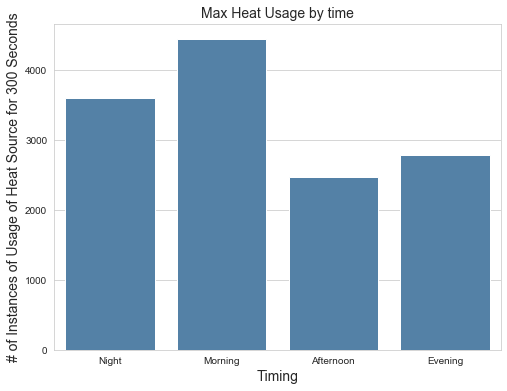

In [330]:
plt.figure(figsize = (8, 6))
sns.set_style('whitegrid')

#Using Seaborn Countplot
heatUsage = sns.countplot(data = house_data[house_data['auxHeat1'] == 300.0], x = 'timing', color = 'steelblue')


heatUsage.set_xlabel("Timing", fontsize = 14)
heatUsage.set_ylabel('# of Instances of Usage of Heat Source for 300 Seconds', fontsize = 14)
plt.title('Max Heat Usage by time', fontsize = 14)
plt.show()

In [337]:
!pip install bokeh

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [340]:
!pip install holoviews
# import holoviews as hv

     |████████████████████████████████| 4.3 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 12.8 MB 10.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 4.6 MB/s eta 0:00:011
     |████████████████████████████████| 76 kB 5.6 MB/s eta 0:00:011
     |████████████████████████████████| 10.7 MB 91 kB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 2.7 MB/s eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.3.3-py3-none-any.whl size=11342778 sha256=0dc70271917ffaa371beed7699fff4e682db7b38a94b29786e9dad11aad0def1
  Stored in directory: /Users/soniajoseph/Library/Caches/pip/wheels/57/e3/79/051e58e8a3d9076de99bdd7d68d463289e28c18329933984ff
Successfully built bokeh
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
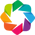

In [341]:
import numpy as np
import pandas as pd
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [342]:
hv.Distribution(house_data['auxHeat1']).opts(title="Heat Runtime Distribution", color="green", xlabel="HeatRuntime", ylabel="Density")\
                            .opts(opts.Distribution(width=700, height=300,tools=['hover'],show_grid=True))

:Distribution   [auxHeat1]   (Density)

In [381]:
house_data['Date']=[d.date() for d in house_data["DateTime"]]


In [382]:
house_data.head()

Month  DayOfWeek  HourofDay  Day            DateTime HvacMode  \
date                                                                        
2019-01-01      1          1          0    1 2019-01-01 00:00:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:05:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:10:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:15:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:20:00     heat   

           Event Schedule  T_ctrl  T_stp_cool  ...  compHeat1  compHeat2  \
date                                           ...                         
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...        0.0        0.0   

              fan  Thermostat_Temperature  Thermostat_Motion  \
date                                                           
2019-01-01  165.0                    70.0                0.0   
2019-01-01  135.0                    70.0                0.0   
2019-01-01  300.0                    70.0                0.0   
2019-01-01  180.0                    70.0                0.0   
2019-01-01  120.0                    70.0                0.0   

            Remote_Sensor_1_Temperature  Remote_Sensor_1_Motion  T_out  \
date                                                                     
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   

            RH_out        Date  
date                            
2019-01-01    95.0  2019-01-01  
2019-01-01    95.0  2019-01-01  
2019-01-01    95.0  2019-01-01  
2019-01-01    95.0  2019-01-01  
2019-01-01    95.0  2019-01-01  

[5 rows x 29 columns]

In [383]:
month_rd = np.round(house_data['Date'].apply(lambda x : x.strftime("%Y-%m")).value_counts(normalize=True).sort_index() * 100,decimals=1)
month_rd_bar = hv.Bars(month_rd).opts(color="green")
month_rd_curve = hv.Curve(month_rd).opts(color="red")

(month_rd_bar * month_rd_curve).opts(title="Monthly Readings Count", xlabel="Month", ylabel="Percentage", yformatter='%d%%', width=700, height=300,tools=['hover'],show_grid=True)


:Overlay
   .Bars.I  :Bars   [index]   (Date)
   .Curve.I :Curve   [index]   (Date)

In [469]:
r1 = np.round(house_data[house_data['auxHeat1']==300]['Month'].value_counts(normalize=True).sort_index() * 100, decimals=1)
r2 = np.round(house_data[house_data['auxHeat1']<300]['Month'].value_counts(normalize=True).sort_index() * 100, decimals=1)


In [476]:
# runtime = pd.merge(runtime1,runtime2,right_index=True,left_index=True).rename(columns={'x':runtime1, 'y':runtime2},axis=1, inplace=True)
# runtime


seconds = pd.merge(r1,r2,right_index=True,left_index=True).rename(columns={'Month_x':'==', 'Month_y':'<'})
# runtime
print(seconds)

      ==     <
1   27.2   8.5
2   14.0   5.6
3   15.2  10.3
4    7.9  12.7
5    4.7  13.9
6    1.2  12.7
9    0.2   0.1
10   2.5  12.9
11  11.5  11.8
12  15.6  11.4


In [477]:
seconds = pd.melt(seconds.reset_index(), ['index']).rename(columns={'index':'Month', 'variable':'seconds'})

seconds

Month seconds  value
0       1      ==   27.2
1       2      ==   14.0
2       3      ==   15.2
3       4      ==    7.9
4       5      ==    4.7
5       6      ==    1.2
6       9      ==    0.2
7      10      ==    2.5
8      11      ==   11.5
9      12      ==   15.6
10      1       <    8.5
11      2       <    5.6
12      3       <   10.3
13      4       <   12.7
14      5       <   13.9
15      6       <   12.7
16      9       <    0.1
17     10       <   12.9
18     11       <   11.8
19     12       <   11.4

In [480]:
hv.Bars(seconds, ['Month', 'seconds'], 'value').opts(opts.Bars(title="Max Monthly Heat Usage ", width=700, height=400,tools=['hover'],show_grid=True, ylabel="Count",multi_level=False))

:Bars   [Month,seconds]   (value)

#### Feature selection

In [53]:
#house_data = pd.read_csv("../Downloads/clean_data1.csv")

In [344]:
house_data.head()

Month  DayOfWeek  HourofDay  Day            DateTime HvacMode  \
date                                                                        
2019-01-01      1          1          0    1 2019-01-01 00:00:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:05:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:10:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:15:00     heat   
2019-01-01      1          1          0    1 2019-01-01 00:20:00     heat   

           Event Schedule  T_ctrl  T_stp_cool  ...    fan  \
date                                           ...          
2019-01-01  Hold    Sleep    70.0        70.0  ...  165.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...  135.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...  300.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...  180.0   
2019-01-01  Hold    Sleep    70.0        70.0  ...  120.0   

            Thermostat_Temperature  Thermostat_Motion  \
date                                                    
2019-01-01                    70.0                0.0   
2019-01-01                    70.0                0.0   
2019-01-01                    70.0                0.0   
2019-01-01                    70.0                0.0   
2019-01-01                    70.0                0.0   

            Remote_Sensor_1_Temperature  Remote_Sensor_1_Motion  T_out  \
date                                                                     
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   
2019-01-01                         67.0                     0.0   41.0   

            RH_out  season  Season  timing  
date                                        
2019-01-01    95.0  Winter  Winter   Night  
2019-01-01    95.0  Winter  Winter   Night  
2019-01-01    95.0  Winter  Winter   Night  
2019-01-01    95.0  Winter  Winter   Night  
2019-01-01    95.0  Winter  Winter   Night  

[5 rows x 31 columns]

In [55]:
house_data = house_data[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out', 'auxHeat1']]

In [56]:
house_data.head()

T_ctrl  T_stp_heat  T_out  RH_out  auxHeat1
0    70.0        70.0   41.0    95.0       0.0
1    70.0        70.0   41.0    95.0      30.0
2    70.0        70.0   41.0    95.0     300.0
3    70.0        70.0   41.0    95.0     135.0
4    70.0        70.0   41.0    95.0       0.0

In [57]:
house_data.auxHeat1.value_counts().index

Float64Index([  0.0, 300.0,  90.0, 180.0,  30.0, 225.0, 270.0, 120.0,  15.0,
               45.0, 240.0,  60.0, 105.0, 285.0, 135.0, 150.0,  75.0, 165.0,
              195.0, 210.0, 255.0],
             dtype='float64')

In [58]:
house_data.auxHeat1.value_counts().values

array([50470, 13319,   530,   517,   505,   502,   502,   500,   491,
         486,   485,   481,   475,   471,   470,   469,   468,   468,
         465,   455,   437])

In [59]:
## Splitting the dataset into 12 steps lists to convert 5min to 1 hour interval

start, end = 0, len(house_data)

cur = 0
ls = list()
step = 12
while start <= end - 12:
    cur = start + step
    #print(cur)
    
    ls.append(list(range(start, cur)))
    
    start = cur

In [60]:
# df2 will have the aggregates value for the taget variable

house_df = pd.DataFrame({"T_ctrl": [], 
                    "T_stp_heat": [], 
                    "T_out" : [], 
                    "RH_out" : [],
                    "auxHeat1" : []})

In [61]:
for i in ls:
    dummy, n = pd.DataFrame(house_data.iloc[i].sum()).T, len(i)
    
    ## printed dummy variable to check the data at this level
    #print(dummy,n)
    
    dummy[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] = dummy[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] / n
    #print(dummy) - we divide the actual values of independant varibales by 12(step)
    
    house_df = house_df.append(dummy, ignore_index = True)
    #print(df2)

In [62]:
house_df.head()

T_ctrl  T_stp_heat  T_out  RH_out  auxHeat1
0    70.0        70.0   41.5    95.5     960.0
1    70.0        70.0   42.0    94.0    1065.0
2    70.0        70.0   41.5    92.5    1575.0
3    70.0        70.0   38.5    89.5    1440.0
4    70.0        70.0   35.0    86.0    1680.0

In [86]:
#removing auxHeat = 0 after aggregation
house_df= house_df[house_df['auxHeat1'] != 0.0]

In [92]:
temppp = house_df.copy()

In [94]:
temppp['auxHeat1'] == 0.0

0       False
1       False
2       False
3       False
4       False
        ...  
6073    False
6075    False
6077    False
6078    False
6079    False
Name: auxHeat1, Length: 3658, dtype: bool

In [100]:
temppp.auxHeat1.value_counts().index

Float64Index([3600.0,  540.0,  810.0,  480.0,  825.0, 1080.0,  870.0,  885.0,
               465.0,  795.0,
              ...
              3480.0, 3465.0, 3495.0, 3225.0, 3315.0, 3525.0, 3405.0, 3255.0,
              3210.0,  375.0],
             dtype='float64', length=237)

#### Data Visualization

#### From here we will be focussing on dependant variable

In [95]:
import warnings
warnings.filterwarnings("ignore")

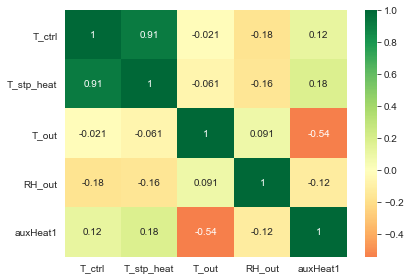

In [96]:
b = sns.heatmap(house_df.corr(), xticklabels=house_df.corr().columns, yticklabels=house_df.corr().columns, cmap='RdYlGn', center=0, annot=True)
#b.title = "Corr"

plt.tight_layout()
#plt.show()

In [97]:
# b = sns.pairplot(house_df,hue='auxHeat1',vars=['T_ctrl','T_stp_heat','T_out','RH_out'], 
#              palette='viridis')
# b.fig.suptitle("Correlation Between Selected Features", y=1.09,fontsize=25)
# b._legend.set_bbox_to_anchor((1.25, 1.05))

# plt.tight_layout()

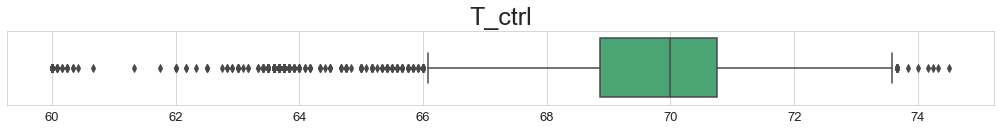

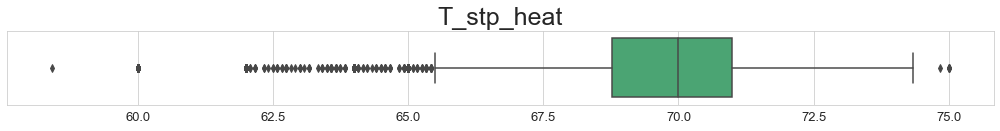

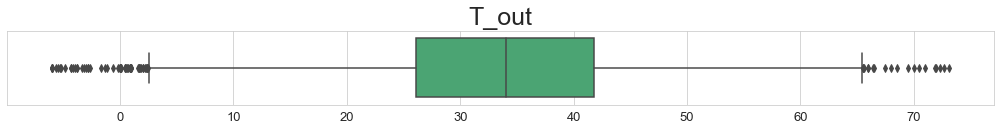

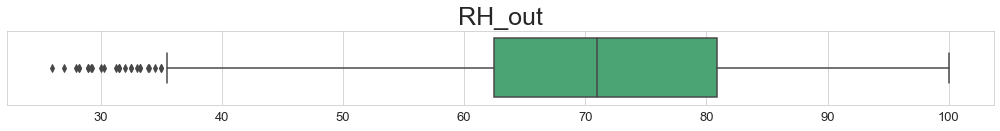

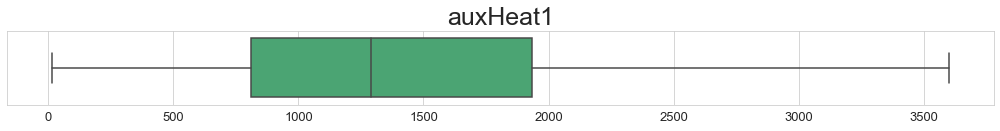

In [98]:
plots = ['T_ctrl','T_stp_heat','T_out','RH_out', 'auxHeat1']
for i in plots:
    plt.figure(figsize = (14, 6))
    plt.subplot(411)
    b = sns.boxplot(house_df[i], color='mediumseagreen')
    b.axes.set_title(i,fontsize=25)
    b.set(xlabel=None)
    b.set(yticks=[])
    b.tick_params(labelsize=13)

    plt.tight_layout()

In [177]:
house_df

T_ctrl  T_stp_heat  T_out  RH_out  auxHeat1
0       70.0        70.0   41.5    95.5     960.0
1       70.0        70.0   42.0    94.0    1065.0
2       70.0        70.0   41.5    92.5    1575.0
3       70.0        70.0   38.5    89.5    1440.0
4       70.0        70.0   35.0    86.0    1680.0
...      ...         ...    ...     ...       ...
6073    70.0        70.0   33.0    71.5     765.0
6075    70.0        70.0   32.0    74.5     825.0
6077    70.0        70.0   29.5    78.0     870.0
6078    70.0        70.0   29.0    75.5     885.0
6079    70.0        70.0   31.0    68.5     930.0

[3658 rows x 5 columns]

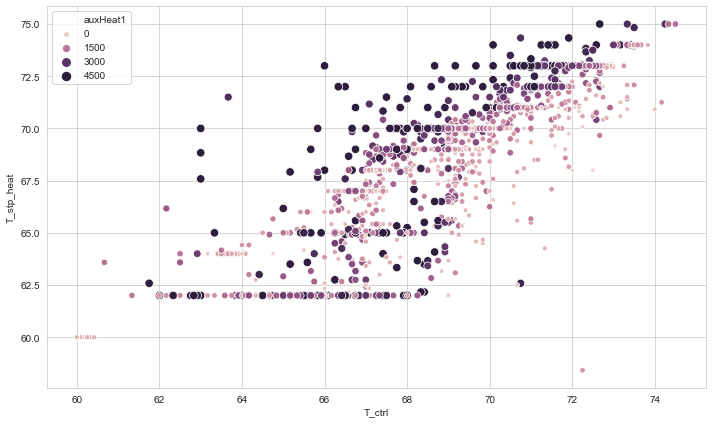

In [176]:
plt.figure(figsize=(10,6))
b = sns.scatterplot(x = 'T_ctrl', y = 'T_stp_heat', 
                    data = house_df, hue = 'auxHeat1', size = 'auxHeat1');

# b.axes.set_title("Ad clicked - Time Spend/Internet Usage",fontsize=25)
# b.set_xlabel("Daily Time Spent On Site",fontsize=18)
# b.set_ylabel("Daily Internet Usage",fontsize=18)
# b.tick_params(labelsize=13)

#plt.colorbar()

plt.tight_layout()

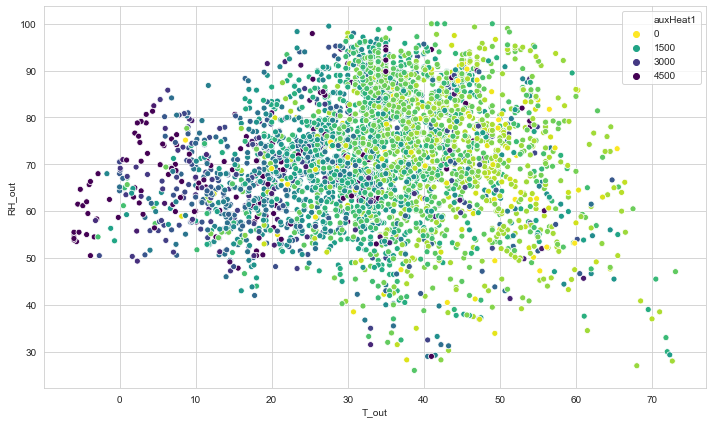

In [102]:
plt.figure(figsize=(10,6))
b = sns.scatterplot(x = 'T_out', y = 'RH_out', 
                    data = house_df, hue = 'auxHeat1', palette='viridis_r');

# b.axes.set_title("Ad clicked - Time Spend/Internet Usage",fontsize=25)
# b.set_xlabel("Daily Time Spent On Site",fontsize=18)
# b.set_ylabel("Daily Internet Usage",fontsize=18)
# b.tick_params(labelsize=13)

plt.tight_layout()

[Text(0.5, 0, 'Target Variable Values')]

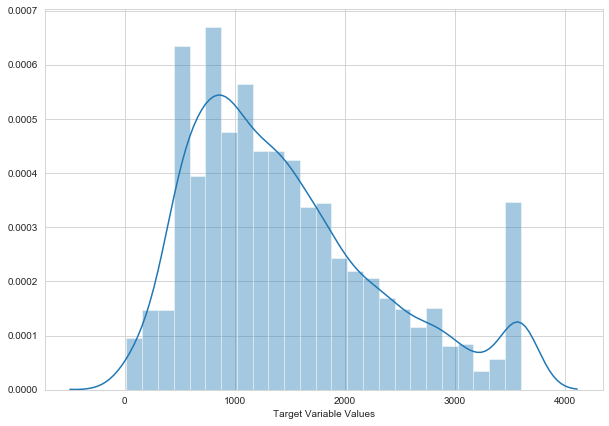

In [109]:
plt.figure(figsize = (10, 7))
ax = sns.distplot(house_df.auxHeat1)
ax.set(xlabel = 'Target Variable Values')